In [1]:
from understatscraper import Understat
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from mplsoccer.pitch import Pitch, VerticalPitch

In [2]:
understat = Understat()

In [31]:
# creating dataframe

ids = [2015,2016,2017,2018,2019,2020,2021]

df = pd.DataFrame()
for x in ids:
    df_firmino = understat.season('EPL', x, team='Liverpool', player='Roberto Firmino')
    df = df.append(df_firmino)

In [37]:
df.to_csv('firmino.csv')

In [32]:
arsenal = df[(df['h_team']=='Arsenal') |(df['a_team']=='Arsenal')]

In [71]:
arsenal['result'].value_counts()

BlockedShot    12
MissedShots    10
Goal            9
SavedShot       4
ShotOnPost      2
Name: result, dtype: int64

In [64]:
arsenal[['X','Y','xG']] = arsenal[['X','Y','xG']].apply(pd.to_numeric,axis=1)

In [38]:
xG = round(arsenal['xG'].sum(),2)

In [43]:
goal = len(arsenal[arsenal['result']=='Goal'])

In [49]:
conversion = round(len(arsenal[arsenal['result']=='Goal'])/len(arsenal),2)

In [69]:
arsenal[['X','Y']] = arsenal[['X','Y']]*100

### Creating Shot Map

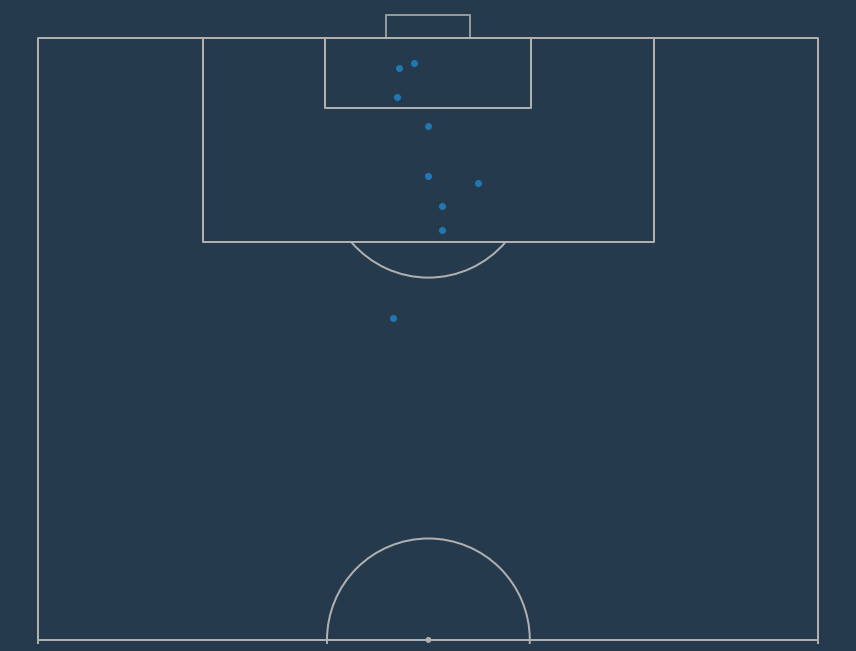

In [74]:
pitch = VerticalPitch(pad_bottom=0.5,
                     half=True,
                     goal_alpha=0.8,
                     pitch_type='opta',
                     goal_type='box',
                     pitch_color='#263a4d')

fig, ax = pitch.draw(figsize=(12,10))

fig.patch.set_facecolor('#263a4d')

pitch.scatter(arsenal[arsenal['result']=='Goal']['X'],arsenal[arsenal['result']=='Goal']['Y'],ax=ax)

In [73]:
arsenal[arsenal['result']=='Goal']

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
2,53890,9,Goal,87.900002,43.599998,0.081261,Roberto Firmino,h,482,FromCorner,2015,LeftFoot,289,Liverpool,Arsenal,3,3,2016-01-14 00:00:00,None,Rebound
3,53892,18,Goal,76.699997,54.500000,0.027114,Roberto Firmino,h,482,OpenPlay,2015,RightFoot,289,Liverpool,Arsenal,3,3,2016-01-14 00:00:00,James Milner,Pass
0,119467,8,Goal,95.099998,54.000000,0.524415,Roberto Firmino,h,482,OpenPlay,2016,RightFoot,3401,Liverpool,Arsenal,3,1,2017-03-04 17:30:00,Sadio Mané,Cross
3,158669,16,Goal,92.699997,50.099998,0.417501,Roberto Firmino,h,482,OpenPlay,2017,Head,7148,Liverpool,Arsenal,4,0,2017-08-27 16:00:00,Joseph Gomez,Cross
11,182897,70,Goal,84.000000,48.200001,0.073893,Roberto Firmino,a,482,OpenPlay,2017,LeftFoot,7301,Arsenal,Liverpool,3,3,2017-12-22 19:45:00,Emre Can,Pass
2,263685,13,Goal,97.900002,51.799999,0.624166,Roberto Firmino,h,482,OpenPlay,2018,RightFoot,9391,Liverpool,Arsenal,5,1,2018-12-29 17:30:00,None,Dispossessed
3,263686,15,Goal,86.000000,48.200001,0.356926,Roberto Firmino,h,482,OpenPlay,2018,LeftFoot,9391,Liverpool,Arsenal,5,1,2018-12-29 17:30:00,None,TakeOn
10,263697,64,Goal,88.500000,50.000000,0.761169,Roberto Firmino,h,482,Penalty,2018,RightFoot,9391,Liverpool,Arsenal,5,1,2018-12-29 17:30:00,None,Standard
7,463614,61,Goal,97.500000,53.799999,0.771223,Roberto Firmino,a,482,OpenPlay,2021,RightFoot,16636,Arsenal,Liverpool,0,2,2022-03-16 20:15:00,Andrew Robertson,Pass
